**Nama : Muhammad Gufril Firdaus\
Bootcamp : Data Science 30\
Final Project Data Analyst : Customer Segementation (RFM) - UrbanMart Dataset**



###Import Library

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Import Dataframe

In [240]:
df = pd.read_csv('UrbanMart_Transactions.csv')

In [234]:
df.head()

,TransactionID,CustomerID,TransactionValue,ProductCategory,PaymentMethod,CustomerGender,CustomerAgeGroup,Region,Quarter
TransactionDate,,,,,,,,,
2023-04-09,TRANS000000,CUST01574,467907,Sport,Bank Transfer,Female,>50,Surabaya,2023Q2
2024-08-05,TRANS000001,CUST01836,2713789,Beauty,Credit Card,Female,26-35,Surabaya,2024Q3
2024-04-07,TRANS000002,CUST01291,4539248,Fashion,Bank Transfer,Male,18-25,Bandung,2024Q2
2024-06-12,TRANS000003,CUST00245,3058426,Home,Bank Transfer,Male,36-50,Jakarta,2024Q2
2023-12-18,TRANS000004,CUST00163,3304874,Fashion,Bank Transfer,Female,26-35,Jakarta,2023Q4


###DataFrame information

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TransactionID     50000 non-null  object
 1   CustomerID        50000 non-null  object
 2   TransactionDate   50000 non-null  object
 3   TransactionValue  50000 non-null  int64 
 4   ProductCategory   50000 non-null  object
 5   PaymentMethod     50000 non-null  object
 6   CustomerGender    50000 non-null  object
 7   CustomerAgeGroup  50000 non-null  object
 8   Region            50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Insight :
  - Terdiri dari 9 kolom
  - Memiliki 5000 data rows
  - Tidak ada missing value
  - Tidak ada duplicate
  - Kolom TransactionDate dengan type data object, harus diubah menjadi datetime

###Data Dictionary

| Nama Kolom             | Deskripsi                                           |
|------------------------|-----------------------------------------------------|
|TransactionID           | Identifikasi unik untuk setiap transaksi
|CustomerID              | Identifikasi unik untuk setiap pelanggan
|TransactionDate         | Tanggal transaksi
|TransactionValue        | Nilai total transaksi (dalam Rupiah Indonesia)
|ProductCategory         | Kategori produk yang dibeli (misalnya, Elektronik, Fashion)
|PaymentMethod           | Metode pembayaran yang digunakan (misalnya, Transfer Bank, E-Wallet)
|CustomerGender          | Jenis kelamin pelanggan (misalnya, Laki-laki, Perempuan)
|CustomerAgeGroup        | Kelompok umur pelanggan (misalnya, 18–25 tahun)
|Region                  | Kota atau wilayah tempat pelanggan berada



###Check Missing Value

In [190]:
df.isna().sum()

,0
TransactionID,0
CustomerID,0
TransactionDate,0
TransactionValue,0
ProductCategory,0
PaymentMethod,0
CustomerGender,0
CustomerAgeGroup,0
Region,0


###Check Duplicate

In [191]:
df.duplicated().sum()

0

### Check Outlier Kolom Numerik

In [192]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

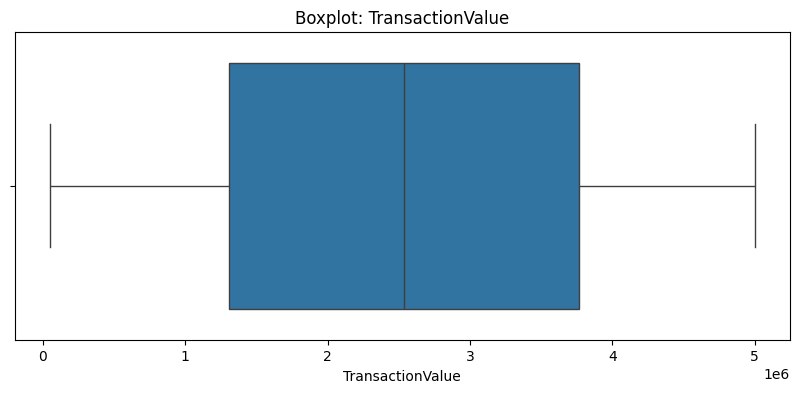

In [193]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

Insight:

Tidak Ada Outlier

##Exploratory Data Analysis

###Mengubah Type Data

In [241]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.set_index('TransactionDate', inplace=True)

###Tren Penjualan

<ipython-input-242-550dc44acf0a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


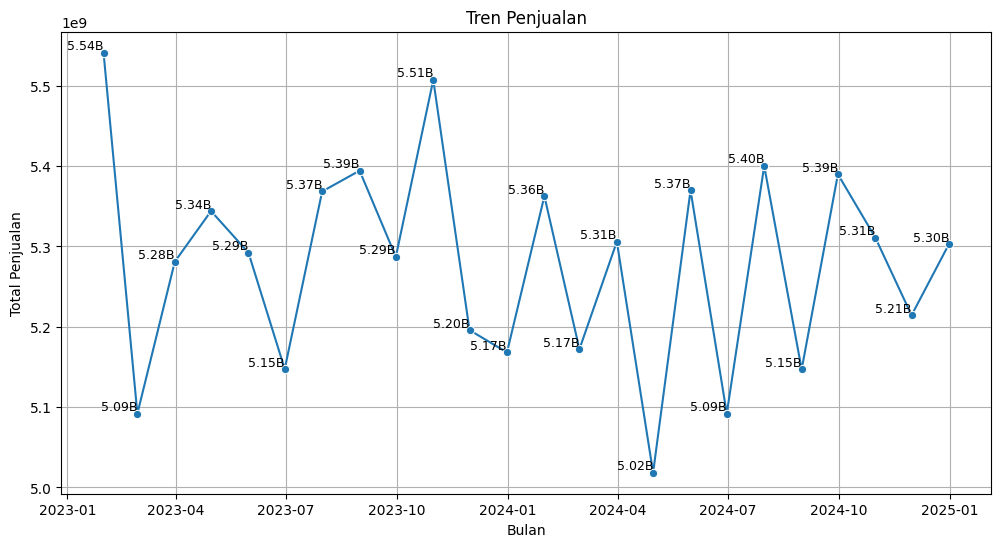

In [242]:
monthly_sales = df.resample('M').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='TransactionValue', marker='o')
for x, y in zip(monthly_sales.index, monthly_sales['TransactionValue']):
    plt.text(x, y, f'{y/1e9:.2f}B', ha='right', va='bottom', fontsize=9, color='black')

plt.title('Tren Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

Insight:
- Tren Penjualan dari tahun 2023 - 2024 mengalami fluktuasi dimana puncaknya pada awal tahun 2023 dengan total penjualan sebanyak 5.54 Milyar dan terendah pada bulan ke 4 tahun 2025 dengan total penjualan sejumlah 5.02 milyar

###Tren Customer

<ipython-input-196-6aa4ce0b5462>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['CustomerID'].nunique()


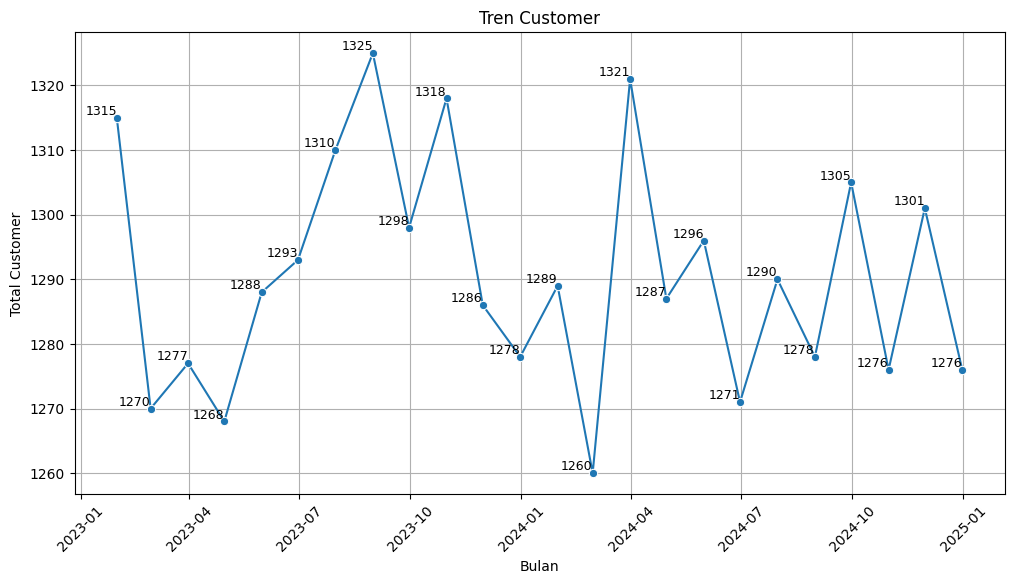

In [196]:
monthly_sales = df.resample('M')['CustomerID'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')

for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, f'{y}', ha='right', va='bottom', fontsize=9, color='black')

plt.title('Tren Customer')
plt.xlabel('Bulan')
plt.ylabel('Total Customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insight:
- Tren customer juga mengalami fluktuasi sepanjang tahun 2023 sampai 2024 dengan total customer tertinggi pada september 2023 sebanyak 1325 customer dan terendah pada tahun 2024 dengan total 1260 customer

###Kategori Produk Terhadap Total Penjualan

In [197]:
## Mengelompokkan berdasarkan kategori produk dan menghitung total penjualan per kategori
group_productcategory= df.groupby('ProductCategory')['TransactionValue'].sum().sort_values(ascending=False).reset_index()
group_productcategory

,ProductCategory,TransactionValue
0,Beauty,25527171369
1,Home,25428873639
2,Electronics,25303636525
3,Sport,25253480291
4,Fashion,25190896411


<ipython-input-198-598864bcc6b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategory', y='TransactionValue', data=group_productcategory, palette='viridis')


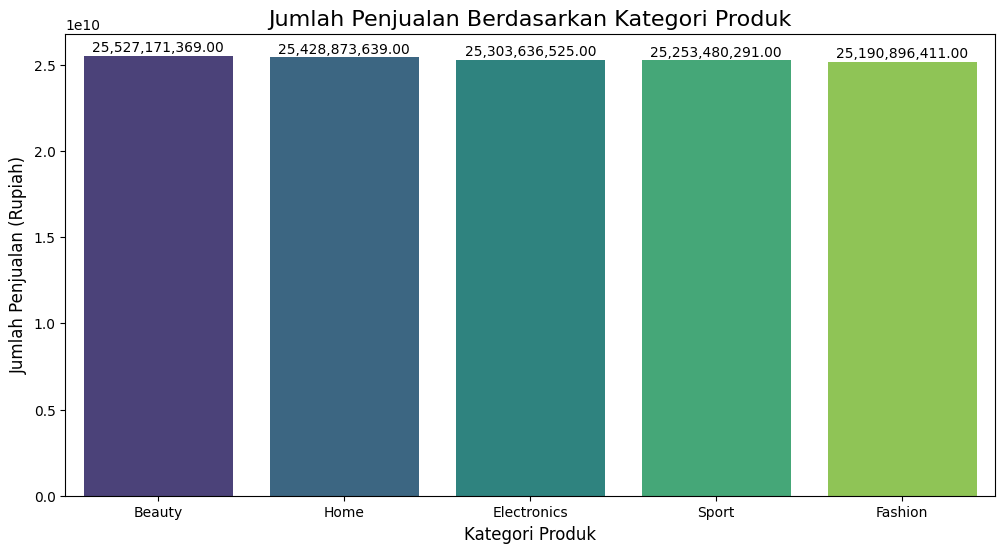

In [198]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductCategory', y='TransactionValue', data=group_productcategory, palette='viridis')

for i, total in enumerate(group_productcategory['TransactionValue']):
    plt.text(i, total + (0.01 * group_productcategory['TransactionValue'].max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

plt.title('Jumlah Penjualan Berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Penjualan (Rupiah)', fontsize=12)
plt.show()

Insight:

Tidak ada perbedaan yang signifikan antar tiap kategori. Namun kategori yang memilki kontribusi paling besar yaitu berasal dari kategori beauty sejumlah 25,53 miliar

###Wilayah atau outlet mana yang memiliki performa terbaik berdasarkan jumlah transaksi

In [199]:
## Mengelompokkan wilayah/region berdasarkan jumlah transaksi
group_region= df.groupby('Region')['TransactionID'].count().sort_values(ascending=False).reset_index()
group_region

,Region,TransactionID
0,Surabaya,9094
1,Yogyakarta,8624
2,Medan,8378
3,Denpasar,8269
4,Jakarta,7914
5,Bandung,7721


<ipython-input-200-77972b7cb766>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='JumlahTransaksi', data=group_region, palette='viridis')


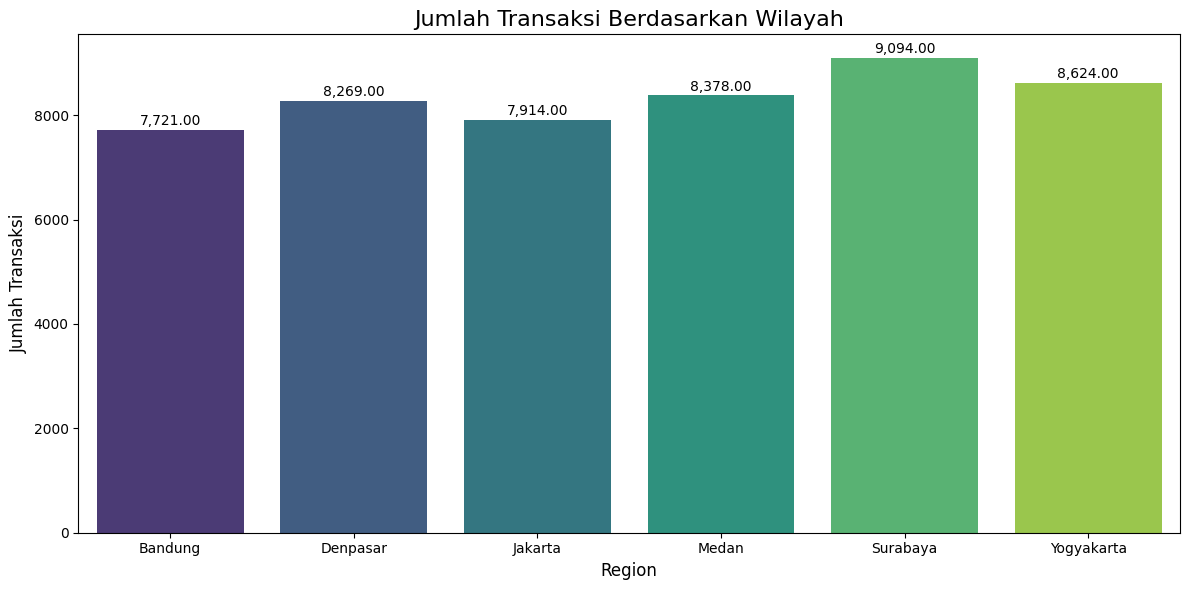

In [200]:
# mengelompokkan data berdasarkan wilayah dan hitung jumlah transaksi
group_region = df.groupby("Region").agg(JumlahTransaksi=("TransactionID", "count")).reset_index()

#Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='JumlahTransaksi', data=group_region, palette='viridis')

for i, total in enumerate(group_region['JumlahTransaksi']):
    plt.text(i, total + (0.01 * group_region['JumlahTransaksi'].max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

plt.title('Jumlah Transaksi Berdasarkan Wilayah', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.tight_layout()
plt.show()


Insight:

- Surabaya merupakan wilayah yang memiliki jumlah transaksi terbanyak
- Bandung menjadi wilayah yang paling sedikit transaski nya, bisa tingkatkan promosi atau iklan untuk menarik minat pelanggan.

###Wilayah atau outliet yang memiliki performa terbaik berdasarkan total penjualan

In [201]:
# mengelompokkan data berdasarkan wilayah dan hitung total penjualan
group_region_value = df.groupby('Region').agg(Total_Sales=('TransactionValue', 'sum')).sort_values(by='Total_Sales', ascending=False).reset_index()
group_region_value

,Region,Total_Sales
0,Surabaya,23162092495
1,Yogyakarta,21699242597
2,Medan,21148688482
3,Denpasar,20881874280
4,Jakarta,20197657242
5,Bandung,19614503139


<ipython-input-202-d018cbe6daf3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Sales', data=group_region_value, palette='viridis')


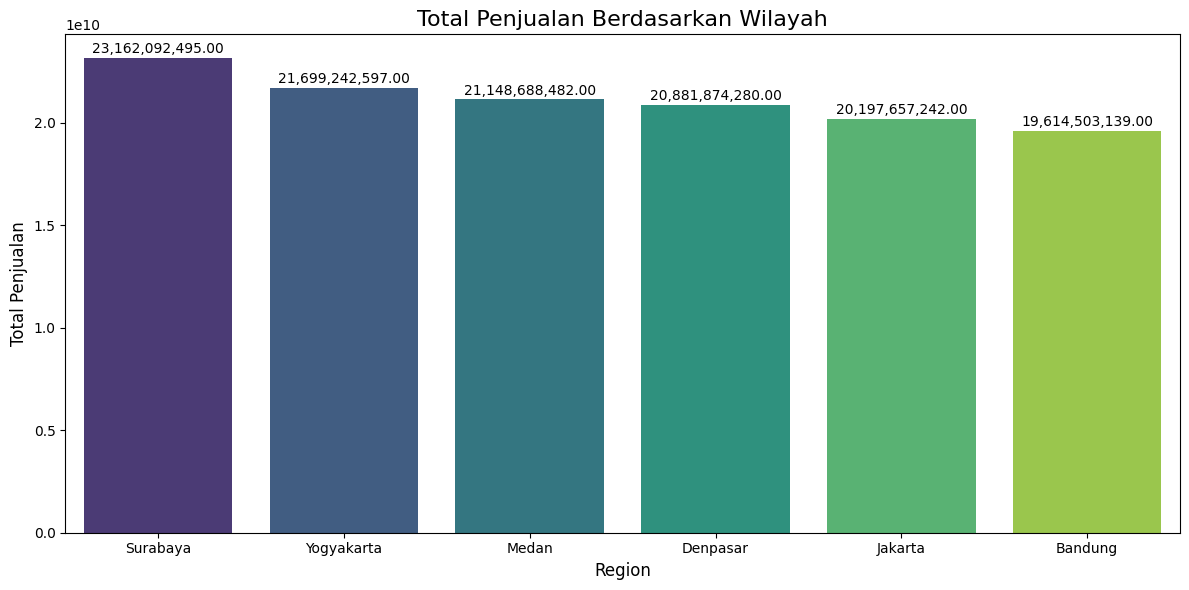

In [202]:
#Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total_Sales', data=group_region_value, palette='viridis')

for i, total in enumerate(group_region_value['Total_Sales']):
    plt.text(i, total + (0.01 * group_region_value['Total_Sales'].max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

plt.title('Total Penjualan Berdasarkan Wilayah', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)

plt.tight_layout()
plt.show()

Insight:
- Surabaya merupakan wilayah yang memiliki total penjualan terbanyak yaitu 23.162.092.495 ini sebanding dengan banyak nya jumlah transaksi dikota tersebut.
- Saam hal nya dengan jumlah transaksi, Bandung juga menjadi wilayah yang paling sedikit total penjualan nya yaitu 19.614.503.139

###Tren Kategori Produk per Kuartal

In [259]:
df['Quarter'] = df.index.to_period('Q').astype(str)

In [262]:
quarterly_sales = df.groupby(['Quarter', 'ProductCategory'])['TransactionValue'].sum().unstack()


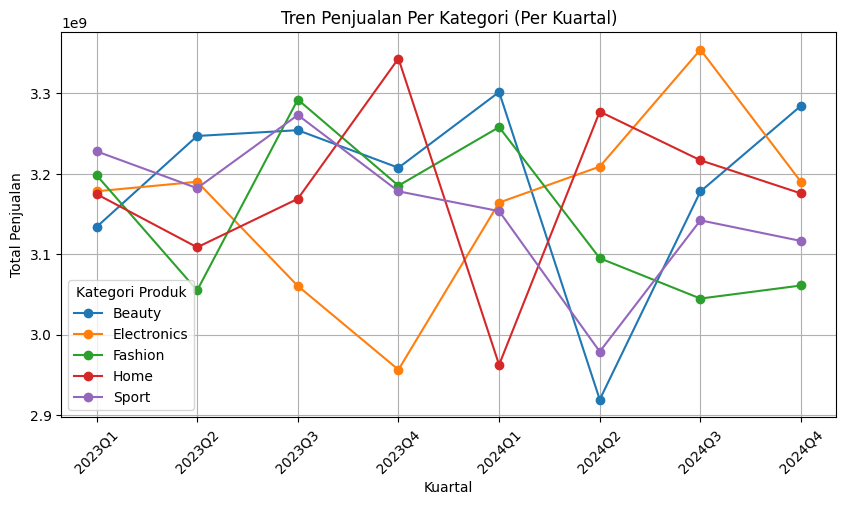

In [264]:
plt.figure(figsize=(10,5))
for category in quarterly_sales.columns:
    plt.plot(quarterly_sales.index, quarterly_sales[category], marker='o', label=category)

plt.title("Tren Penjualan Per Kategori (Per Kuartal)")
plt.xlabel("Kuartal")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.legend(title="Kategori Produk")
plt.grid()

plt.show()